In [1]:
from packages.gtrsb import readTrafficSigns
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from packages.gtrsb import processImage, plotTrafficSign
import numpy
import joblib
import statistics
import matplotlib.pyplot as plt
%matplotlib inline






In [2]:
classes = [3, 7, 13, 14, 15, 16, 17, 18, 4, 5]
tracks = {3: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
          7: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
          13: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
          14: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
          15: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
          16: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
          17: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
          18: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
          4: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
          5: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)}
trainImages, trainDims, trainROIs, \
trainLabels, filenames = readTrafficSigns('./GTSRB/Final_Training/Images', classes, tracks)

In [3]:
tam = len(trainImages)
print(tam)

3000


In [4]:
pr_img = []
for i in range(tam):
    pr_img.append(processImage(trainImages[i],trainROIs[i]))
data_set = numpy.array(pr_img)
data = data_set.reshape(tam, -1)

In [5]:
print(trainLabels[90])

3


In [6]:
X, y = data, trainLabels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [7]:
# Don't cheat - fit only on training data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

In [16]:
net = MLPClassifier(solver='sgd',\
                    hidden_layer_sizes=(60, 30, ),\
                    max_iter=4000)

In [17]:
net.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(60, 30), max_iter=4000, solver='sgd')

In [18]:

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
score = net.score(X_test, y_test)*100
print("-----------------------")    
print('Score: %.2f' % score)

-----------------------
Score: 93.58


In [19]:
expected = y_test
predicted = net.predict(X_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

          13       0.95      0.95      0.95       114
          14       0.96      0.97      0.96       113
          15       0.91      0.95      0.93       104
          16       0.97      0.94      0.96       125
          17       0.93      0.95      0.94       131
          18       0.98      0.98      0.98       129
           3       0.94      0.86      0.90       117
           4       0.95      0.96      0.96       123
           5       0.96      0.84      0.90       128
           7       0.83      0.95      0.89       116

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



In [20]:
print(metrics.confusion_matrix(expected, predicted))

[[108   1   4   0   1   0   0   0   0   0]
 [  1 110   1   0   1   0   0   0   0   0]
 [  2   1  99   0   1   1   0   0   0   0]
 [  0   0   1 118   0   0   3   0   1   2]
 [  3   2   0   0 125   1   0   0   0   0]
 [  0   0   0   0   3 126   0   0   0   0]
 [  0   0   2   1   2   0 101   1   3   7]
 [  0   1   0   0   0   0   0 118   0   4]
 [  0   0   0   1   2   0   4   4 108   9]
 [  0   0   2   2   0   0   0   1   1 110]]


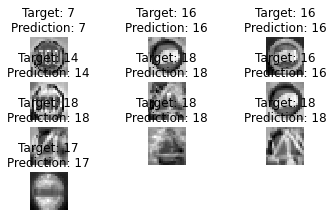

In [21]:
images_and_predictions = list(zip(X_test, predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(5, 3, index+1)
    plt.axis('off')
    plt.imshow(image.reshape((20,20)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Target: %s\nPrediction: %s' % (y_test[index],prediction))

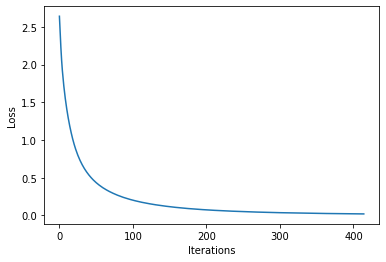

In [22]:
plt.plot(net.loss_curve_);
plt.xlabel('Iterations');
plt.ylabel('Loss');

In [23]:
score = 0
vec = []
for i in range(100):
    X, y = data, trainLabels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    vec.append(net.score(X_test, y_test)*100)
score = sum(vec) / 100
print("-----------------------")    
print('Score: %.2f' % score)
print("-----------------------")
print('Desviación tipica: %.2f' % statistics.stdev(vec))
print("-----------------------")    


-----------------------
Score: 97.31
-----------------------
Desviación tipica: 0.35
-----------------------


In [24]:
joblib.dump(scaler, 'signs_scaler_Boix_Gil.pkl') 
joblib.dump(net, 'signs_net_Boix_Gil.pkl')

['signs_net_Boix_Gil.pkl']